该文件用于展示DNS模型的代码实现。

# 模型
## Nelson-Siegel模型
$$
y_t(\tau)=L+S\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}\right)+C\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}-e^{-\lambda\tau}\right)+\epsilon_t(\tau)\tag{1}
$$
## DNS模型
$$
y_t(\tau)=L_t+S_t\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}\right)+C_t\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}-e^{-\lambda\tau}\right)+\epsilon_t(\tau)\tag{2}
$$
$$
\begin{bmatrix}
L_t\\S_t\\C_t
\end{bmatrix} + \begin{bmatrix}
\mu_l\\ \mu_s\\ \mu_c
\end{bmatrix} + \begin{bmatrix}
\phi_{t-1}^{ll} & \phi_{t-1}^{ls} & \phi_{t-1}^{lc}\\
\phi_{t-1}^{sl} & \phi_{t-1}^{ss} & \phi_{t-1}^{sc}\\
\phi_{t-1}^{cl} & \phi_{t-1}^{cs} & \phi_{t-1}^{cc}
\end{bmatrix}\begin{bmatrix}
L_{t-1}\\S_{t-1}\\C_{t-1}
\end{bmatrix}+\begin{bmatrix}
\epsilon_{t}^{l}\\ \epsilon_{t}^{s}\\ \epsilon_{t}^{c}
\end{bmatrix}\tag{3}
$$
将式(2)表示为矩阵形式：
$$
\begin{bmatrix}
y_t(\tau_1)\\y_t(\tau_2)\\\vdots\\y_t(\tau_n)
\end{bmatrix} = \begin{bmatrix}
1 & \frac{1-e^{-\lambda\tau_1}}{\lambda\tau_1} & \frac{1-e^{-\lambda\tau_1}}{\lambda\tau_1}-e^{-\lambda\tau_1}\\
1 & \frac{1-e^{-\lambda\tau_2}}{\lambda\tau_2} & \frac{1-e^{-\lambda\tau_2}}{\lambda\tau_2}-e^{-\lambda\tau_2}\\
\vdots & \vdots & \vdots\\
1 & \frac{1-e^{-\lambda\tau_n}}{\lambda\tau_n} & \frac{1-e^{-\lambda\tau_n}}{\lambda\tau_n}-e^{-\lambda\tau_n}
\end{bmatrix}\begin{bmatrix}
L_t\\S_t\\C_t
\end{bmatrix} + \begin{bmatrix}
\eta_{t}^{l}\\ \eta_{t}^{s}\\ \eta_{t}^{c}
\end{bmatrix}\tag{4}
$$
并将式(3)(4)表示为紧凑形式，
$$
y_t =  Z f_t + \epsilon_t, \epsilon_t\sim N(0,H)\tag{5}
$$
$$
f_t = \mu + \Phi f_{t-1} + \eta_t, \eta_t\sim N(0,Q)\tag{6}
$$
其中，$\begin{bmatrix}y_t(\tau_1)\\y_t(\tau_2)\\\vdots\\y_t(\tau_n) \end{bmatrix}$, 
$Z_t=\begin{bmatrix}
1 & \frac{1-e^{-\lambda\tau_1}}{\lambda\tau_1} & \frac{1-e^{-\lambda\tau_1}}{\lambda\tau_1}-e^{-\lambda\tau_1}\\
1 & \frac{1-e^{-\lambda\tau_2}}{\lambda\tau_2} & \frac{1-e^{-\lambda\tau_2}}{\lambda\tau_2}-e^{-\lambda\tau_2}\\
\vdots & \vdots & \vdots\\
1 & \frac{1-e^{-\lambda\tau_n}}{\lambda\tau_n} & \frac{1-e^{-\lambda\tau_n}}{\lambda\tau_n}-e^{-\lambda\tau_n}
\end{bmatrix}$, 
$\epsilon_t=\begin{bmatrix}\epsilon_{t}^{l}\\\epsilon_{t}^{s}\\\epsilon_{t}^{c}\end{bmatrix}$, 
$\mu=\begin{bmatrix}\mu_l\\ \mu_s\\ \mu_c\end{bmatrix}$, 
$f_t=\begin{bmatrix}L_t\\ S_t\\ C_t \end{bmatrix}$, 
$\Phi=\begin{bmatrix}
\phi_{t-1}^{ll} & \phi_{t-1}^{ls} & \phi_{t-1}^{lc}\\
\phi_{t-1}^{sl} & \phi_{t-1}^{ss} & \phi_{t-1}^{sc}\\
\phi_{t-1}^{cl} & \phi_{t-1}^{cs} & \phi_{t-1}^{cc}
\end{bmatrix}$, $\eta_t=\begin{bmatrix}\eta_{t}^{l}\\\eta_{t}^{s}\\\eta_{t}^{c}\end{bmatrix}$.





式(5)(6)构成了一个状态空间模型，借助于Kalman递归和极大似然估计法，可以估计出模型参数。

$$
\begin{aligned}
v_t & = y_t - Za_t,\\[6pt]
F_t & = ZP_tZ^\top + H, \\[6pt]
K_t & = P_tZ^\top F_t^{-1}, \\[6pt]
a_{t|t} & = a_t + K_tv_t, \\[6pt]
P_{t|t} & = (I-K_tZ)P_t, \\[6pt]
a_{t+1} & = \mu + \Phi a_{t|t}, \\[6pt]
P_{t+1} & = \Phi P_{t|t}\Phi^\top + Q.
\end{aligned}
$$

算法为，

- 给出初始值$a_0$和$P_0$；
- 根据前3个表达式，分别计算出$v_t$和$F_t$；
- 得到对数似然值
$loglikelihood_t=-\frac{n}{2}\log(2\pi)-\frac{1}{2}\log(|F_t|)-\frac{1}{2}v_t^\top F_t^{-1}v_t$；
- 根据后两个表达式得到$a_{t+1}$和$P_{t+1}$, 进而得到下一期的$a_{t+1}$和$P_{t+1}$.

In [51]:
import pandas as pd
from WindPy import w
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv, det, inv
from scipy.optimize import minimize

w.start()

.ErrorCode=0
.Data=[Already connected!]

# 数据

In [46]:
## 获取中债国债到期收益率
y = w.edb('S0059741,S0059742,S0059744,S0059745,S0059746,S0059747,S0059748,S0059749',
        '2006-01-01','2025-03-31','Fill=Previous')

y = pd.DataFrame({'Date': y.Times, 'M3': y.Data[0], "M6": y.Data[1], "M12": y.Data[2], "M24": y.Data[3], "M36": y.Data[4],
                  "M60": y.Data[5], "M84": y.Data[6], "M120": y.Data[7]})
y['Date'] = pd.to_datetime(y['Date'])
## 生成年份月份和日
y['Year'] = y['Date'].dt.year
y['Month'] = y['Date'].dt.month
y["Day"] = y["Date"].dt.day

## 计算月均利率
y=y.groupby(['Year', 'Month'])[['M3', 'M6', 'M12', 'M24', 'M36', 'M60', 'M84', 'M120']].mean()
y = y.reset_index().drop(columns=['Year', 'Month'])
y['Date']=pd.date_range("2006-01-06", periods=len(y), freq='ME')
y.set_index('Date', inplace=True)
y=y.values

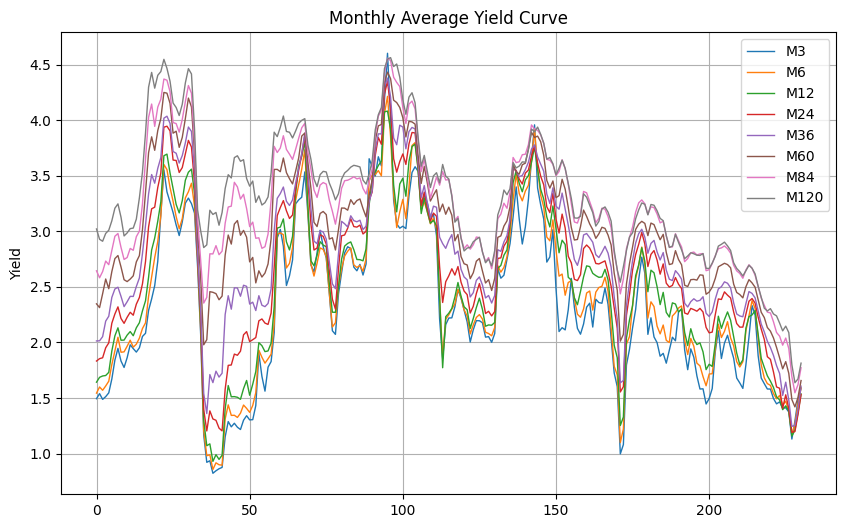

In [47]:
## 绘制月均利率曲线
plt.figure(figsize=[10,6])
plt.plot(y, linewidth=1)
plt.xlabel('')
plt.ylabel('Yield')
plt.title('Monthly Average Yield Curve')
plt.legend(['M3', 'M6', 'M12', 'M24', 'M36', 'M60', 'M84', 'M120'])
plt.grid()
plt.show()

# 代码

In [48]:
tau = np.array([3, 6, 12, 24, 36, 60, 84, 120])

# ----------------------
# 参数转换函数
# ----------------------
def trans_fun(b0):
    """将无约束参数转换为有约束参数"""
    b1 = b0.copy()
    b1[18:] = b0[18:] ** 2  # 测量误差方差必须非负
    return b1

def inv_trans(b0):
    """将有约束参数转换回无约束参数"""
    b1 = b0.copy()
    b1[18:] = np.sqrt(b0[18:])  # 测量误差方差取平方根
    return b1

# ----------------------
# 模型结构函数
# ----------------------
def Z_func(tau, lambda_):
    """构建载荷矩阵"""
    level = np.ones(len(tau))
    slope = (1 - np.exp(-lambda_ * tau)) / (lambda_ * tau)
    curvature = slope - np.exp(-lambda_ * tau)
    return np.vstack((level, slope, curvature)).T  

# ----------------------
# 似然函数
# ----------------------
def loglike(par, data, tau):
    """卡尔曼滤波实现"""
    parameters = trans_fun(par)
    
    # 参数解包
    mu = parameters[:3].reshape(-1, 1)               # (3,1)
    A = parameters[3:12].reshape(3, 3)               # (3,3)
    R = np.array([parameters[12:15], 
                [0, parameters[15], parameters[16]],
                [0, 0, parameters[17]]])             # (3,3)
    Q = R.T @ R                                      # (3,3)
    H = np.diag(parameters[18:26])                   # (8,8)
    lambda_ = parameters[26]
    
    Z = Z_func(tau, lambda_)                         # (8,3)
    n = len(data)                                    # 修复作用域问题
    
    # 初始化状态变量
    a = inv(Z.T.dot(Z)) @ Z.T.dot(data.T)           # (3,n)
    at = a[:,0].reshape(-1,1)                       # (3,1)
    Pt = np.cov(a)                          
    
    log_likelihood = 0
    
    for t in range(0, n):
        # 预测误差
        y_pred = Z @ at
        v = data[t].reshape(-1, 1) - y_pred  # (8,1)
        
        # 预测协方差
        F = Z @ Pt @ Z.T + H                      # (8,8)
        Finv = np.linalg.pinv(F)                  # 使用伪逆避免奇异矩阵
        
        # 卡尔曼增益
        K = Pt @ Z.T @ Finv                       # (3,8)
        
        # 状态更新
        att = at + K @ v                          # (3,1)
        Ptt = Pt - K @ Z @ Pt
        
        # 状态预测
        at = mu + A @ att                        # (3,1)
        Pt = A @ Ptt @ A.T + Q                   # (3,3)
        
        # 似然计算
        log_likelihood += -0.5*(np.log(det(F)) + v.T @ Finv @ v)
    
    return -log_likelihood.item()

# ----------------------
# 优化执行
# ----------------------
# 参数初始值
par_con = np.array([
    1.997690e-01, -3.338602e-01, -3.520518e-01,  # mu
    9.471776e-01, 1.419361e-03, -2.646524e-03,   # A
    5.423613e-03, 9.664373e-01, 9.521912e-03,
    9.312241e-03, 5.930423e-03, 9.495892e-01,    # R
    1.520206e-01, -1.221930e-01, -1.543193e-01,
    2.466212e-01, -6.254171e-02, 4.142537e-01,
    # 测量误差方差
    1.009440e-03, 3.441935e-03, 4.415885e-03, 4.336852e-03,
    3.675118e-03, 2.681963e-03, 4.749289e-03, 3.579744e-03,
    3.680881e-02  # lambda
])

par_un = inv_trans(par_con)

# 执行优化
results = minimize(
    loglike,
    par_un,
    method='Nelder-Mead',
    args=(y, tau),  
    options={'maxiter': 5000}
)

while True:
    pre_value = results.fun
    pre_par = results.x
    results = minimize(
        loglike,
        pre_par,
        method='Nelder-Mead',
        args=(y, tau),  
        options={'maxiter': 5000}
    )
    if abs(results.fun - pre_value) < 1e-2:
        break


print(results)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -3657.0986262158026
             x: [ 4.945e-02 -9.236e-02 ...  5.906e-06  2.197e-01]
           nit: 1816
          nfev: 2357
 final_simplex: (array([[ 4.945e-02, -9.236e-02, ...,  5.906e-06,
                         2.197e-01],
                       [ 4.945e-02, -9.238e-02, ...,  5.902e-06,
                         2.197e-01],
                       ...,
                       [ 4.946e-02, -9.236e-02, ...,  5.902e-06,
                         2.197e-01],
                       [ 4.945e-02, -9.235e-02, ...,  5.896e-06,
                         2.197e-01]], shape=(28, 27)), array([-3.657e+03, -3.657e+03, ..., -3.657e+03, -3.657e+03],
                      shape=(28,)))


In [50]:
trans_fun(results.x)

array([ 4.94540115e-02, -9.23625372e-02, -1.94984033e-01,  9.83487899e-01,
        3.64073205e-03, -1.25557155e-02, -4.89744879e-03,  8.82199292e-01,
        6.57608636e-02,  5.33688698e-02,  7.28776609e-02,  8.36054500e-01,
        1.48772167e-01, -1.22086606e-01, -1.46822297e-01,  2.40146513e-01,
       -9.52578437e-03,  4.01255218e-01,  9.97936837e-03,  3.27268935e-08,
        4.26865437e-03,  4.04156140e-03,  3.68797059e-04,  2.43736093e-03,
        4.56151664e-03,  3.48784940e-11,  4.82595065e-02])

In [ ]:
## 模型拟合效果评估
parameters = trans_fun(results.x)
    
# 参数解包
mu = parameters[:3].reshape(-1, 1)               # (3,1)
A = parameters[3:12].reshape(3, 3)               # (3,3)
R = np.array([parameters[12:15], 
            [0, parameters[15], parameters[16]],
            [0, 0, parameters[17]]])             # (3,3)
Q = R.T @ R                                      # (3,3)
H = np.diag(parameters[18:26])                   # (8,8)
lambda_ = parameters[26]
    
Z = Z_func(tau, lambda_)                         # (8,3)
n = len(y)                                   
    
    # 初始化状态变量
a = inv(Z.T.dot(Z)) @ Z.T.dot(y.T)              # (3,n)
at = a[:,0].reshape(-1,1)                       # (3,1)
Pt = np.cov(a)                          
    
att_full = np.zeros((3, n))

for t in range(0, n):
        # 预测误差
    y_pred = Z @ at
    v = y[t].reshape(-1, 1) - y_pred          # (8,1)
        
    # 预测协方差
    F = Z @ Pt @ Z.T + H                      # (8,8)
    Finv = pinv(F)                  # 使用伪逆避免奇异矩阵
        
    # 卡尔曼增益
    K = Pt @ Z.T @ Finv                       # (3,8)
        
    # 状态更新
    att = at + K @ v                          # (3,1)
    att_full[:, t] = att.flatten()
    Ptt = Pt - K @ Z @ Pt
        
    # 状态预测
    at = mu + A @ att                         # (3,1)
    Pt = A @ Ptt @ A.T + Q                    # (3,3)

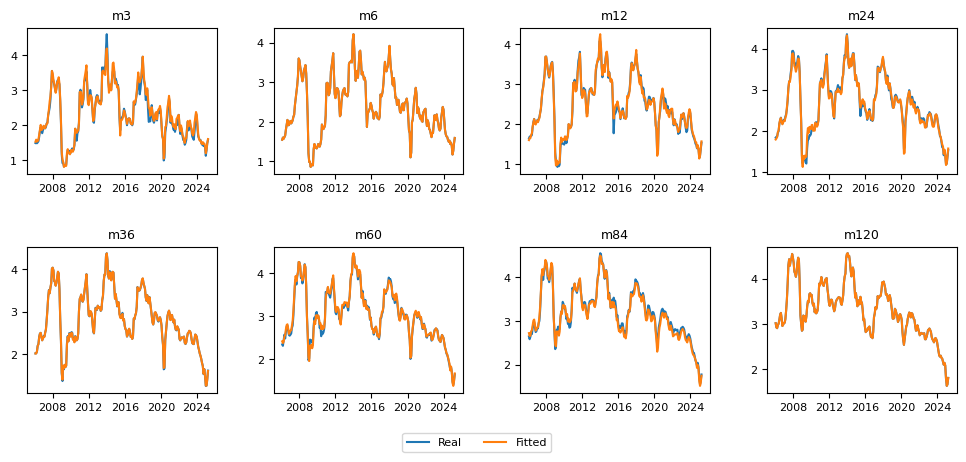

In [97]:
yhat = Z @ att_full
Date = pd.date_range("2006-01-06", periods=len(y), freq='ME')
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))  # 增大画布高度

# 统一图例的句柄和标签
legend_handles = []
legend_labels = []

# 定义通用标签（避免重复）
LINE_LABELS = {'Real': 'Real', 'Fitted': 'Fitted'}

# ------------------------------
# 绘制所有子图
# ------------------------------
for row in range(2):
    for col in range(4):
        ax = axes[row, col]
        idx = row * 4 + col  # 计算当前子图对应的数据索引
        
        # 绘制真实值和拟合值
        line_real, = ax.plot(Date, y[:, idx], label=LINE_LABELS['Real'])
        line_fitted, = ax.plot(Date, yhat[idx, :], label=LINE_LABELS['Fitted'])
        
        # 设置标题和刻度
        ax.set_title(f"m{['3','6','12','24','36','60','84','120'][idx]}", fontsize=9)
        ax.tick_params(axis='both', labelsize=8)
        
        # 仅第一次循环时收集图例句柄
        if not legend_handles:
            legend_handles.extend([line_real, line_fitted])
            legend_labels.extend([LINE_LABELS['Real'], LINE_LABELS['Fitted']])

# ------------------------------
# 调整布局和图例
# ------------------------------
plt.subplots_adjust(
    bottom=0.15,  # 增大底部边距为图例腾出空间
    hspace=0.5,
    wspace=0.3
)

# 添加全局图例
fig.legend(
    handles=legend_handles,
    labels=legend_labels,
    loc='lower center',
    bbox_to_anchor=(0.5, 0.02),  # 进一步降低图例位置
    fontsize=8,
    ncol=2  # 分两列显示
)

plt.show()

In [126]:
## RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error

RMSE_full = np.sqrt(mean_squared_error(y_true=y, y_pred=yhat.T))
MAE_full = mean_absolute_error(y_true=y, y_pred=yhat.T)

print(f"RMSE: {RMSE_full:.4f}")
print(f"MAE: {MAE_full:.4f}")

RMSE: 0.0558
MAE: 0.0329


In [127]:
## 分组计算RMSE, MAE, MAPE
RMSE = np.sqrt(mean_squared_error(y_true=y, y_pred=yhat.T, multioutput='raw_values'))
MAE = mean_absolute_error(y_true=y, y_pred=yhat.T, multioutput='raw_values')

# 保留4位小数
RMSE = np.round(RMSE, 4)
MAE = np.round(MAE, 4)

print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")

RMSE: [0.0999 0.     0.0648 0.0615 0.0091 0.0482 0.0674 0.    ]
MAE: [0.0705 0.     0.0479 0.0438 0.0066 0.036  0.0584 0.    ]


无论是从图像还是从RMSE和MAE的数值来看，DNS模型拟合的效果都非常好。